# 1. Prerequisites and Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

c:\Users\ADMIN\anaconda3\envs\cv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configuration
BASE_URL = "McAuley-Lab/Amazon-Reviews-2023"
CATEGORY = "All_Beauty"

RATINGS_URL = f"5core_rating_only_{CATEGORY}"
REVIEWS_URL = f"raw_review_{CATEGORY}"
METADATA_URL = f"raw_meta_{CATEGORY}"

# 2. Basic Dataset Checkup

In [3]:
def load_data(path):
    try: 
        data = load_dataset(BASE_URL, path)
        df = data["full"].to_pandas()
        return df
    except:
        print("Dataset loaded unsuccessfully.")

In [4]:
ratings_df = load_data(RATINGS_URL)
ratings_df.head(5)

,user_id,parent_asin,rating,timestamp
0,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07J3GH1W1,5.0,1547589356557
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07W397QG4,5.0,1593352422858
2,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07KG1TWP5,5.0,1596473351088
3,AFSKPY37N3C43SOI5IEXEK5JSIYA,B08JTNQFZY,5.0,1617904219785
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,B07SLFWZKN,3.0,1619737501209


In [5]:
reviews_df = load_data(REVIEWS_URL)
reviews_df.head(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [6]:
metadata_df = load_data(METADATA_URL)
metadata_df.head(5)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [7]:
# Shape inspection
print(f"5-core Ratings Shape: {ratings_df.shape}  (Rows = Interactions)")
print(f"Full Reviews Shape: {reviews_df.shape}  (Rows = Total Reviews)")
print(f"Metadata Shape: {metadata_df.shape} (Rows = Unique Products)")

5-core Ratings Shape: (2535, 4)  (Rows = Interactions)
Full Reviews Shape: (701528, 10)  (Rows = Total Reviews)
Metadata Shape: (112590, 16) (Rows = Unique Products)


In [8]:
# Check columns info 
ratings_df.info()
reviews_df.info()
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      2535 non-null   object
 1   parent_asin  2535 non-null   object
 2   rating       2535 non-null   object
 3   timestamp    2535 non-null   object
dtypes: object(4)
memory usage: 79.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   h

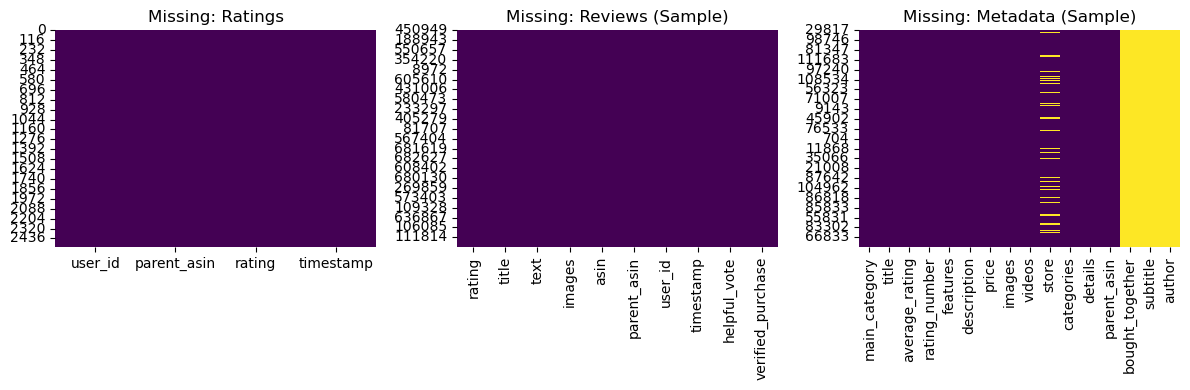

In [9]:
# Visualize missing data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(ratings_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing: Ratings')

plt.subplot(1, 3, 2)
# Sample reviews if dataset is huge to prevent crash
sns.heatmap(reviews_df.sample(min(10000, len(reviews_df))).isnull(), cbar=False, cmap='viridis')
plt.title('Missing: Reviews (Sample)')

plt.subplot(1, 3, 3)
sns.heatmap(metadata_df.sample(min(10000, len(metadata_df))).isnull(), cbar=False, cmap='viridis')
plt.title('Missing: Metadata (Sample)')

plt.tight_layout()
plt.show()

In [10]:
# Check empty fields in images column 
def check_empty_images(val):
    if isinstance(val, list):
        return len(val) == 0
    return pd.isna(val)

empty_imgs_pct = metadata_df['images'].apply(check_empty_images).mean() * 100
print(f"\nPercentage of products with no images: {empty_imgs_pct:.2f}%")


Percentage of products with no images: 0.00%


In [ ]:
# Check the overlapped data between dfs
# The ratings_df and metadat_df are joined on the key "parent_asin"

# First, we'll check the number of 5-core items present in the metadata
unique_items_5core = ratings_df['parent_asin'].unique()
unique_items_meta = set(metadata_df['parent_asin'].unique())
overlap_items = sum([1 for x in unique_items_5core if x in unique_items_meta])
item_coverage = (overlap_items / len(unique_items_5core)) * 100

print(f"Item Coverage: {item_coverage:.2f}% of 5-core items found in Metadata.")

Item Coverage: 100.00% of 5-core items found in Metadata


In [13]:
# Second, we'll check the number of 5-core users present in the reviews data
unique_users_5core = ratings_df["parent_asin"].unique()
unique_users_reviews = set(reviews_df['parent_asin'].unique())
overlap_users = sum([1 for x in unique_users_5core if x in unique_users_reviews])
user_coverage = (overlap_users / len(unique_users_5core)) * 100

print(f"User Coverage: {user_coverage:.2f}% of 5-core users found in Reviews.")

User Coverage: 100.00% of 5-core users found in Reviews.


# 3. Ratings EDA